# PHYS 391 - Linear Fitting
This shows examples of fitting data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Make up some fake data

In [2]:
xdata = np.array([1., 2., 3., 4., 5.])
ydata = np.array([0., 2., 3., 3., 5.])

Draw a simple scatter plot to see what this looks like

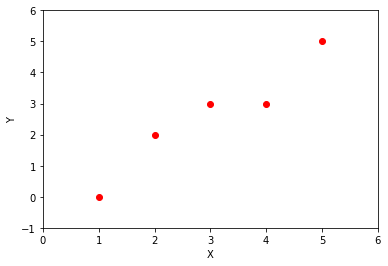

In [3]:
plt.plot(xdata, ydata, 'ro', markersize=6)
plt.xlim(0., 6.)
plt.ylim(-1., 6.)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Perform a linear fit and draw this with the data

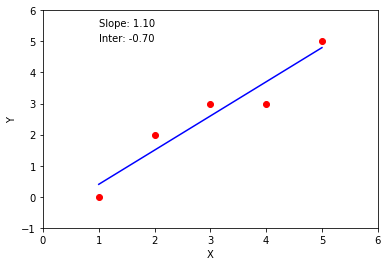

In [4]:
(m, b) = np.polyfit(xdata, ydata, 1)  # 1 is the 'degree', i.e. a linear polynomial
yfit = m*xdata + b

plt.plot(xdata, ydata, 'ro', markersize=6)
plt.plot(xdata, yfit, 'b')
plt.xlim(0., 6.)
plt.ylim(-1., 6.)
plt.text(1,5.5,"Slope: %.2f" % m)
plt.text(1,5.0,"Inter: %.2f" % b)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Make a residual plot

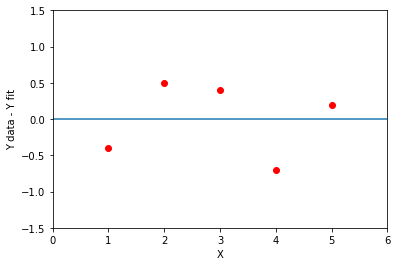

In [5]:
yresid = ydata - yfit

plt.plot(xdata,yresid, 'ro', markersize=6)
plt.xlim(0, 6)
plt.ylim(-1.5, 1.5)
plt.xlabel("X")
plt.ylabel("Y data - Y fit")
plt.plot([0,6], [0, 0])
plt.show()

Bootstrap the errors by calculating the RMS residual

In [6]:
sd = np.sqrt(sum(yresid**2)/(len(xdata)-2))
print("RMS deviation: %.2f" % sd)

RMS deviation: 0.61


Finally, plot original data with derived errors along with fit

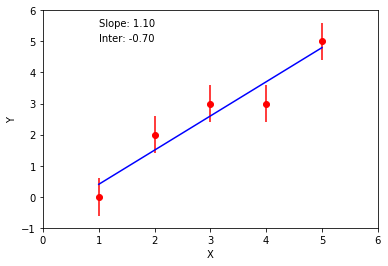

In [7]:
# yerr can either be a single value or an array
plt.errorbar(xdata, ydata, yerr=sd, fmt='ro')
plt.plot(xdata, yfit, 'b')
plt.xlim(0., 6.)
plt.ylim(-1., 6.)
plt.text(1,5.5,"Slope: %.2f" % m)
plt.text(1,5.0,"Inter: %.2f" % b)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Example of errors that are too large

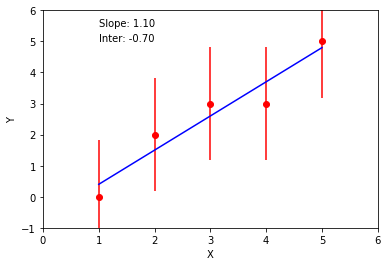

In [8]:
plt.errorbar(xdata, ydata, yerr=(3*sd), fmt='ro')
plt.plot(xdata, yfit, 'b')
plt.xlim(0., 6.)
plt.ylim(-1., 6.)
plt.text(1,5.5,"Slope: %.2f" % m)
plt.text(1,5.0,"Inter: %.2f" % b)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Example of a full fit with errors

In [9]:
# Weight for gaussian errors is 1/sd *not* 1/sd**2
wt = np.full(len(xdata), 1/sd)
# Need cov=True to get errors returned from fit
(m, b), cov = np.polyfit(xdata, ydata, 1, w=wt, cov=True)

# Extract uncertainties from covariance matrix
dm = np.sqrt(cov[0,0])
db = np.sqrt(cov[1,1])

In [10]:
print("Slope: %.2f +/- %.2f" % (m, dm))
print("Inter: %.2f +/- %.2f" % (b, db))
print("Correlation: %.2f" % (cov[0,1]/dm/db))

Slope: 1.10 +/- 0.19
Inter: -0.70 +/- 0.64
Correlation: -0.90


Show variation in parameters. Errors almost entirely anti-correlated

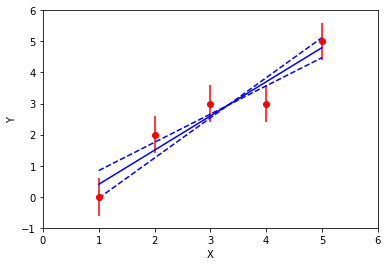

In [11]:
plt.errorbar(xdata, ydata, yerr=sd, fmt='ro')
# Default fit
yfit = m*xdata + b
plt.plot(xdata, yfit, 'b')

# Vary slope+ intercept-
yfit = (m+dm)*xdata + b-db
plt.plot(xdata, yfit, 'b--')
yfit = (m-dm)*xdata + b+db
plt.plot(xdata, yfit, 'b--')

plt.xlim(0., 6.)
plt.ylim(-1., 6.)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()